### Predict the sales of the Retail Store

#### EDA Framework -

1. Univariate Analysis ( Single Variable Analysis) :

    1.1 Numerical Variables - Distplots, Boxplot(Outliers) & Histograms.
   
    1.2 Categorical Variables - Countplot.   
    
    
2. Bivariate/Multivariate Analysis :
   It is done with respect to target variable.
    
    2.1 Num v/s Num : Scatterplot(tells about pattern in the data).
    
    2.2 Category v/s Num : Boxplot, Violinplot and Barplot.
    
    2.3 Category v/s Category : pd.crosstab() to generate the frequency table and then Countplot.
                                
    
    
3. Missing Values


4. Outlier Analysis and Removal :
   Note :  Data which consist revenue, sales and cost outliers are never removed.
   In financial data we never remove outliers.
   
   
5. Feature Engineering : [Most Important]


6. Scaling and Transformation 


7. Categorical Encoding

   Note : Once the above mentioned steps are done, we split the               data in train and test. 

In [2]:
# Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Visualizing Charts.
plt.rcParams['figure.figsize']=[15,6]

In [3]:
# Import the data.
sales = pd.read_csv('train_v9rqX0R.csv')

In [4]:
# Check the shape of the data : Rows and Columns.
print(sales.shape)
print(sales.shape[0])  # Rows
print(sales.shape[1])  # Columns

(8523, 12)
8523
12


In [5]:
# Type of the data.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Univariate Analysis :

* Numerical varable : Displot.

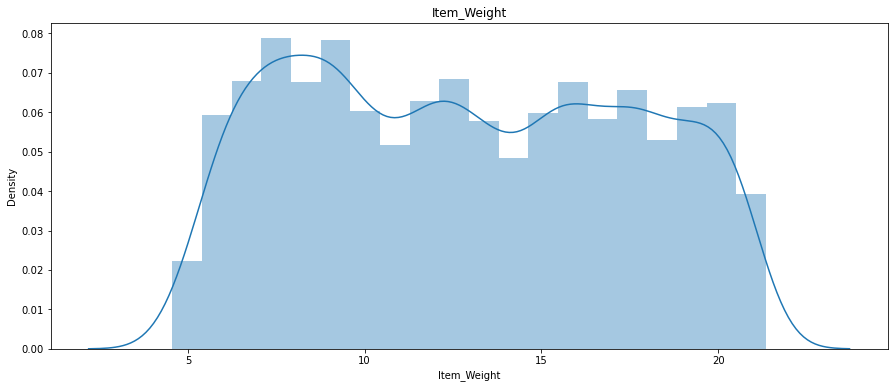

In [6]:
## Item Weight.
sns.distplot(sales.Item_Weight)
plt.title('Item_Weight')
plt.show()

# Since the Spread of the data is high, we can assume that the data 
# is uniformally distributed.

In [7]:
sales.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [8]:
# Skewness.
print('Skewness : ',sales.Item_Weight.skew())

# Mode.
print('Mode : ',sales.Item_Weight.mode()[0])

Skewness :  0.0824262091221237
Mode :  12.15


##### Distplot :  
* Gives shape of the data.
* 3 Shapes : 
    1. Normal Distribution/Gausian Curve :     
       * Appears like bell shape curve.
       * Here, Mean = Median = Mod.
       * Total Area under the curve = 1.
    2. Skewed Curve :
       * The tail points toward positive infinity.
       * The top notch is Mod.
       * Mean lies to the extreme lower side.
       * Median lies between Mod and Mean.
       * Positively Skewed Data: Mean > Median > Mode.
       * Negatively Skewed Data: Mean < Median < Mode.

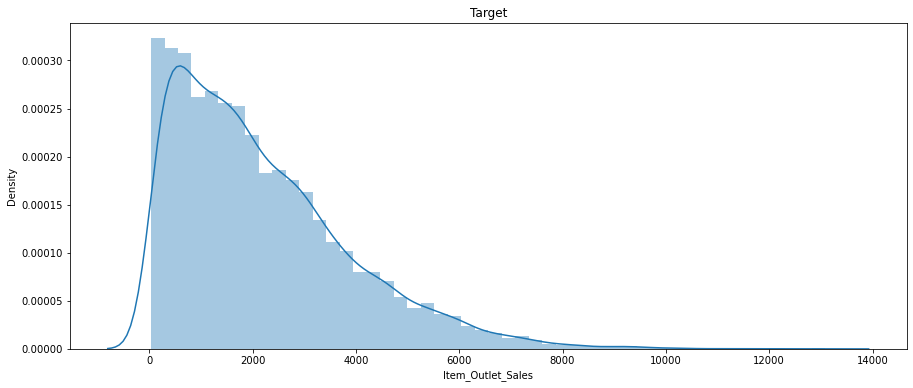

In [14]:
# Target Variable :
sns.distplot(sales.Item_Outlet_Sales)
plt.title("Target")
plt.show()

# Positively Skewed Data.

In [15]:
# Statistical Summary of the Data.
sales.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [17]:
# Skewness.
print('Skewness : ',sales.Item_Outlet_Sales.skew())

# Mode.
print('Mode : ',sales.Item_Outlet_Sales.mode()[0])

Skewness :  1.1775306028542796
Mode :  958.752


#### Skewness :
* The skewness refers to the distortion in the shape of the data due to the presence of Outliers.
* If the data is positively skewed, we will see the skewness value as positively and vice versa for negatively skewed data.
* If the skewness is between 0 to 0.5, we say that the data is normal.
* If the range of skewness is between 0.5 to 1, we can say the data is moderately skewed.
* If the skewness is 1 or more than 1, it is perfectly skewed.

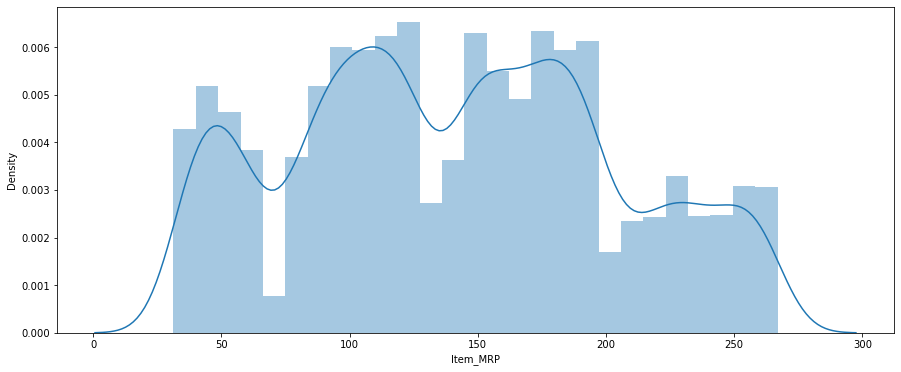

In [18]:
# Item MRP.
sns.distplot(sales.Item_MRP)
plt.show()

# Item MRP shows 4 different frequencies.So it is clear that 
# it is MultiModal Data.
# The deep gaps convience that it is MultiModal Data.

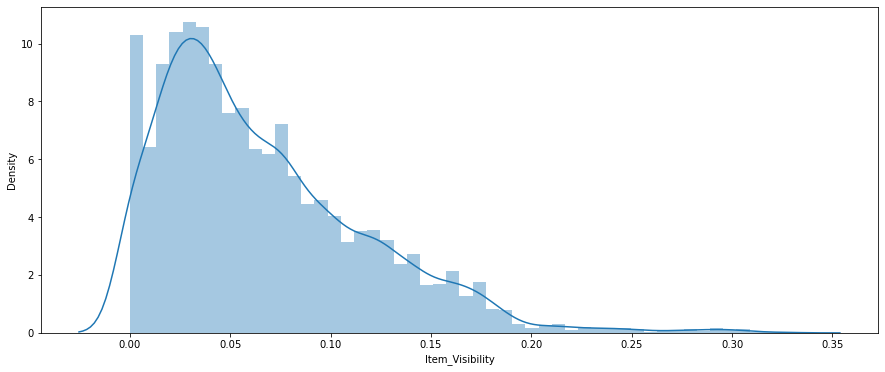

In [19]:
# Item Visibility.
sns.distplot(sales.Item_Visibility)
plt.show()

* Catplot.

In [21]:
# Find out the list of Categories.

#sales.select_dtypes(include = np.number) - Will show only numerical value columns. 

sales.select_dtypes(include='object').columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

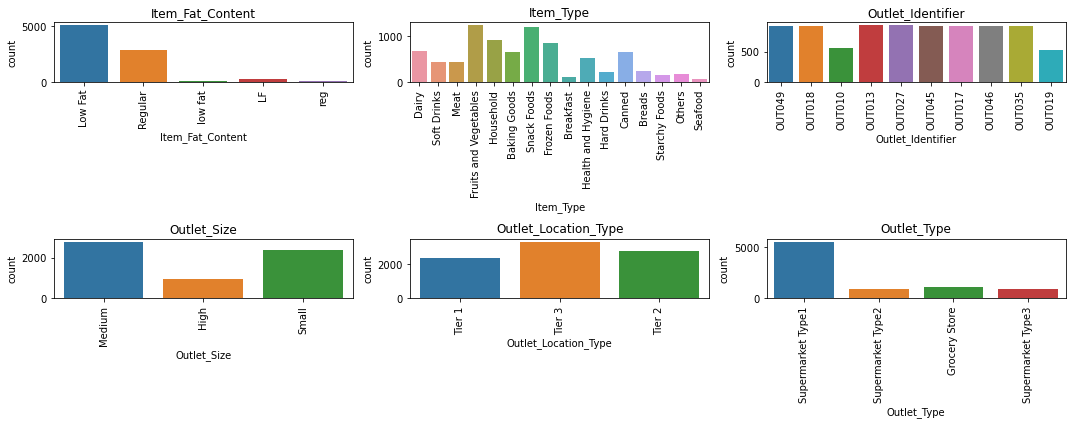

In [60]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# Not including Item_Identifier as its different for all rows.

rows = 2
columns = 3
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(sales.loc[:,i])
    plt.title(i)
    iterator = iterator + 1
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### Inferences :
1. Most of the Products that are sold are **Low Fat** items.
2. The top 5 Item Types are **Fruits & Veggies, Dairy, Snack Food, Household, etc**.
3. Most of the Outlets in the Business are **Medium** Size Outlets.
4. The Business has opened most of their Outlets in **Tier 3 Cities**.
5. The Type of the Outlets is **Supermarket Tier1**.

### Bivariate Analysis :
* Predictors v/s Target.

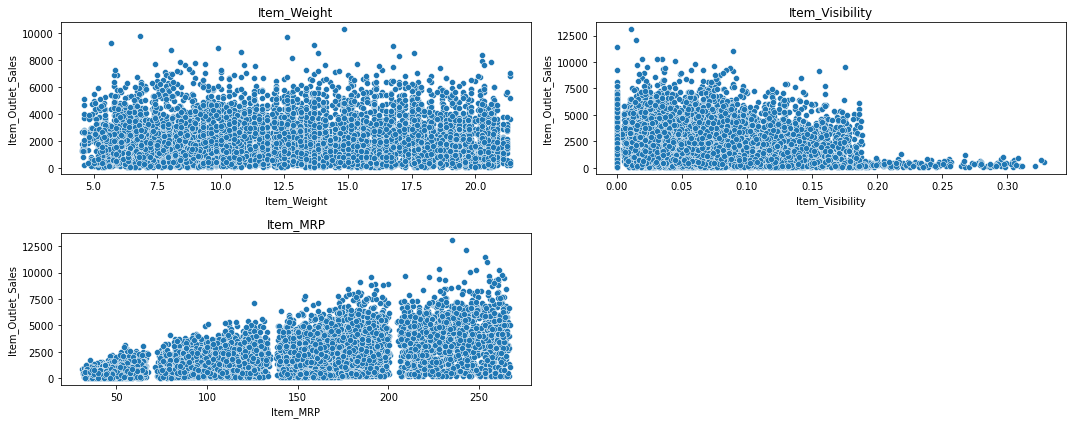

In [42]:
# Num V/s Num.
cols = ['Item_Weight','Item_Visibility','Item_MRP']

rows = 2
columns = 2
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.scatterplot(sales.loc[:,i], sales.Item_Outlet_Sales)
    plt.title(i)
    iterator = iterator + 1

plt.tight_layout()
plt.show()

#### Inference :
* In Item visibility v/s outlet_sales we can see that item visibility has 0's and as the visibility increases, sales goes down.In other words, highly visible items have low sales.

* Category v/s Num :

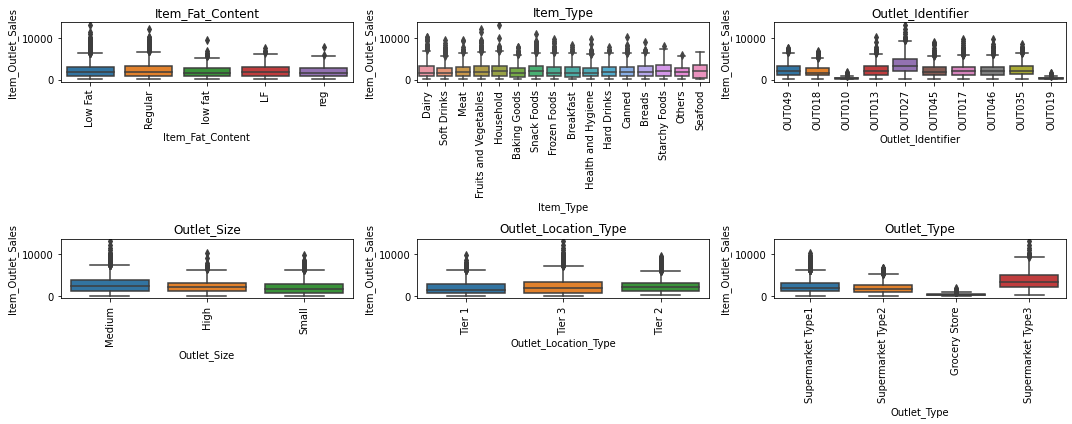

In [45]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
rows = 2
columns = 3
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(sales.loc[:,i],sales.Item_Outlet_Sales)
    plt.title(i)
    iterator = iterator + 1
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

## Def of Outlier : 
* Any value > Q3 + 1.5 X IOR =  **Upper side Outlier** where, IOR = Q3 - Q1.
* Any value < Q1 - 1.5 X IOR =  **Lower side Outlier/Inliers**

IQR : Inter Quartile Range

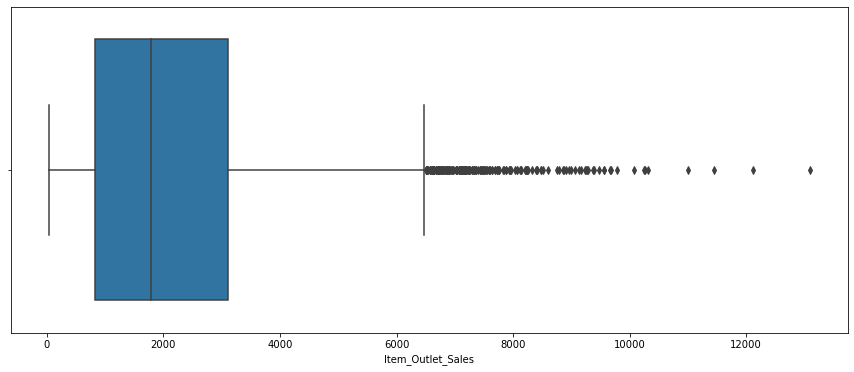

In [47]:
# Boxplot of Target variable :
sns.boxplot(sales.Item_Outlet_Sales)
plt.show()

In [52]:
# Calculate the Quantiles for the target :
print('Q1 : ',sales.Item_Outlet_Sales.quantile(0.25))
print('Q2 : ',sales.Item_Outlet_Sales.quantile(0.50))
print('Q3 : ',sales.Item_Outlet_Sales.quantile(0.75))

q1= sales.Item_Outlet_Sales.quantile(0.25)
q3= sales.Item_Outlet_Sales.quantile(0.75)
print('IOR : ',q3 - q1)

Q1 :  834.2474
Q2 :  1794.331
Q3 :  3101.2964
IOR :  2267.049


In [53]:
# If want IQR for whole Data :
sales.quantile(0.75) - sales.quantile(0.25)

Item_Weight                     8.076250
Item_Visibility                 0.067596
Item_MRP                       91.817200
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.049000
dtype: float64

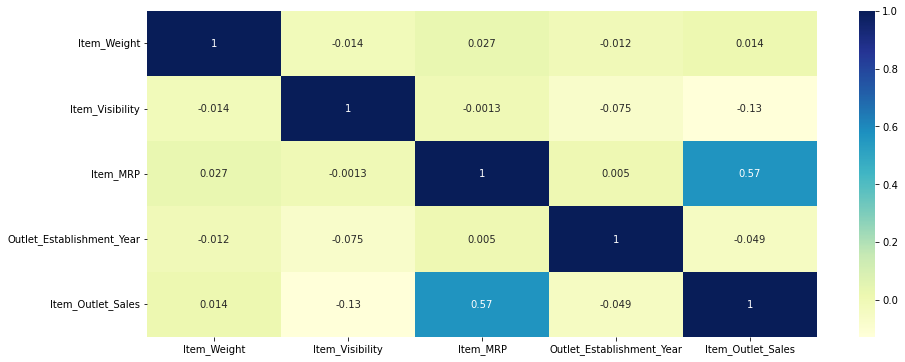

In [57]:
# Heatmap :

# sales.corr()  Gives correlation between numbers.

sns.heatmap(sales.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

* Formula for corr is = cov(x,y)/(sigma)x  X  (sigma)y  

* If coverence (cov) above is negative, then Correlation is also    negative.

* If cov is positive, then Correlation is also positive.

* If cov is form of circle, then Correlation is zero or close to zero. (Not good for analysis)

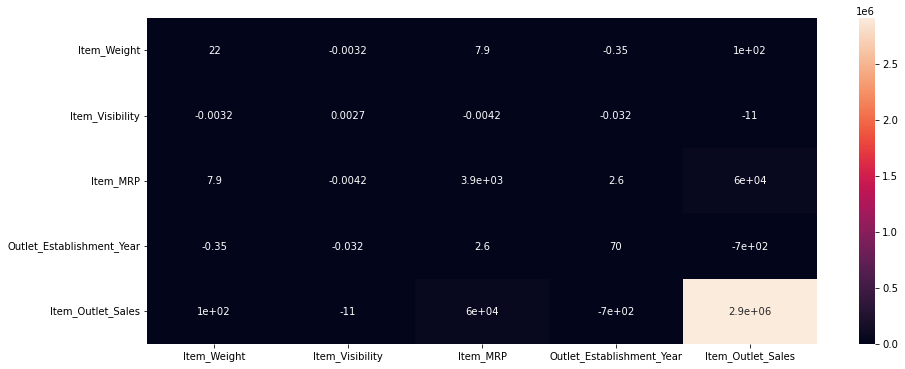

In [59]:
# Covariance : 

sns.heatmap(sales.cov(),annot = True)
plt.show()

* Covariance tells us the direction of the movement of x and y variable where as the Correlation tells us the degree of strength between x and y.

In [63]:
null_value=sales.isnull().sum(axis=0)
null_value

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64